In [105]:
from PIL import Image
import os
import numpy as np
import PIL.ImageOps
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision
import itertools
from architecture import Network

In [106]:
num_samples_each_img = 3

In [107]:
imgs = []
for file in os.listdir('data'):
    with Image.open('data/' + file).convert('L') as img:
        img = img.resize((64,64))
        img = PIL.ImageOps.invert(img)
        for i in range(num_samples_each_img):
            imgs.append(np.array([np.array(img)]))

In [108]:
# num_samples = len(imgs)
num_samples = 1000
imgs = imgs[:num_samples*num_samples_each_img]
print(f"num images: {num_samples*num_samples_each_img}")

num images: 3000


In [109]:
imgs = torch.FloatTensor(imgs)

In [110]:
random_perspective = torchvision.transforms.RandomPerspective(0.3, 0.7)
random_rotation = torchvision.transforms.RandomRotation(5)
for i in range(imgs.shape[0]):
    imgs[i] = random_rotation(random_perspective(imgs[i]))

In [111]:
x = torch.clone(imgs)
x = x.apply_(lambda x: 1 if x > 100 else -1)

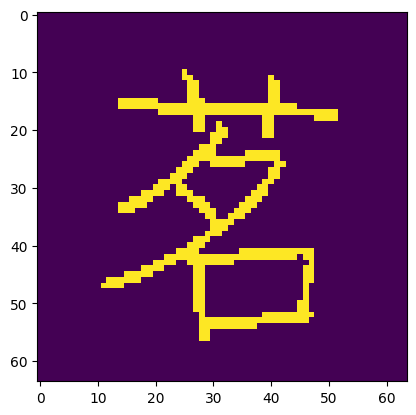

In [112]:
plt.imshow(x[0].swapaxes(2, 0).swapaxes(0, 1))

In [113]:
kanjis = os.listdir('data')[:num_samples]
kanjis = list(map(lambda x: x[:-4], kanjis))
kanji_dict = { i: kanji for (i, kanji) in enumerate(kanjis) }
y = [[i] * num_samples_each_img for i in list(kanji_dict.keys())]
y = list(itertools.chain.from_iterable(y))
y = torch.LongTensor(y)
kanjis

['茗',
 '謂',
 '賎',
 '鬨',
 '鍼',
 '弃',
 '僚',
 '圖',
 '怦',
 '羔',
 '翕',
 '鳳',
 '貘',
 '働',
 '壘',
 '弔',
 '址',
 '使',
 '羃',
 '瀛',
 '矗',
 '怱',
 '恰',
 '葷',
 '豢',
 '鏐',
 '鱈',
 '鰉',
 '梟',
 '杆',
 '磴',
 '缸',
 '碵',
 '罹',
 '俄',
 '偶',
 '鯒',
 '鮓',
 '眺',
 '置',
 '棉',
 '村',
 '惜',
 '堵',
 '乱',
 '帚',
 '噎',
 '冂',
 '慾',
 '椪',
 '愿',
 '曳',
 '楫',
 '祁',
 '舎',
 '訛',
 '鷽',
 '幌',
 '嘘',
 '冕',
 '祖',
 '愨',
 '楼',
 '椽',
 '鶫',
 '閾',
 '薔',
 '艘',
 '訌',
 '藕',
 '趁',
 'ね',
 '湊',
 '渋',
 '槇',
 '晟',
 '熹',
 '縡',
 '瘴',
 '仝',
 '亜',
 '庶',
 '廷',
 'K',
 '苣',
 '鵑',
 '离',
 '癢',
 '槐',
 '榑',
 '典',
 '嚴',
 '廠',
 '夬',
 '事',
 '今',
 'チ',
 'む',
 '鴇',
 '鵆',
 '誠',
 '苴',
 '諡',
 '饌',
 '隕',
 '軫',
 '躪',
 '襦',
 '蛾',
 '唳',
 '勿',
 '劾',
 '稼',
 '綱',
 '穽',
 '涛',
 '族',
 '斎',
 '蛩',
 '軼',
 '酎',
 '麗',
 '助',
 '媼',
 '料',
 '払',
 '涌',
 '戔',
 '痲',
 '爾',
 '疳',
 '醴',
 '陸',
 '釵',
 '臟',
 '蘓',
 '蹇',
 '見',
 '狄',
 '畉',
 '散',
 '櫻',
 '拮',
 '喟',
 '婆',
 '觝',
 '臈',
 '蹐',
 '阮',
 '攵',
 '整',
 '紊',
 '犒',
 '絋',
 '生',
 '嶝',
 '剄',
 '尿',
 '寳',
 '璽',
 '笥',
 '粨',
 '歎',
 '沂',
 '送',
 '顕',
 '衿'

In [114]:
x.shape, y.shape

(torch.Size([3000, 1, 64, 64]), torch.Size([3000]))

In [115]:
# x_train = x.view(num_samples, -1)
x_train = x

In [116]:
model = Network(len_kanji_dict=len(kanji_dict))
sum(p.numel() for p in model.parameters())

1057252

In [117]:
learning_rate = 0.0005
num_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

train_loss = []
for epoch in range(num_epochs):
  output = model(x_train)
  loss = criterion(output, y)
  train_loss.append(loss.item())
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
  predictions = torch.argmax(output, dim=1)
  accuracy = 100 * torch.sum(y == predictions) / len(y)
  print(f'epoch {epoch}/{num_epochs} loss: {loss.item()}  |  accuracy: {torch.round(accuracy, decimals=5)}%                                                   ', end='\r')

KeyboardInterrupt: 

In [ ]:
plt.plot(range(len(train_loss)), train_loss)

NameError: name 'plt' is not defined

In [ ]:
torch.save(model.state_dict(), 'model.pth')

In [ ]:
model = Network(len_kanji_dict=len(kanji_dict))
model.load_state_dict(torch.load('model.pth'))
model.eval()

Network(
  (conv_layers): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout2d(p=0.25, inplace=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Dropout2d(p=0.25, inplace=False)
    (6): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout2d(p=0.25, inplace=False)
    (12): Conv2d(16, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2

In [ ]:
predictions = model(x_train)
predictions = torch.argmax(predictions, dim=1)
accuracy = 100 * torch.sum(y == predictions) / len(y)
print(f'Accuracy: {torch.round(accuracy, decimals=5)}%')

Accuracy: 65.33334350585938%


Correct
茗


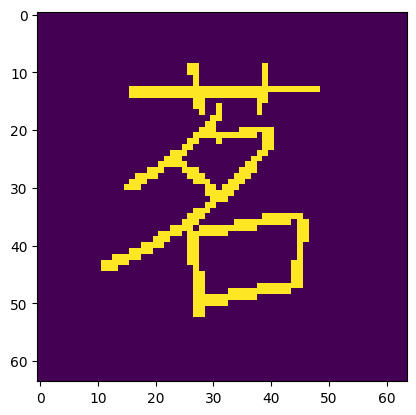

In [ ]:
n = 0
plt.imshow(x_train[n].reshape(64,64))
prediction = model(x_train[n].unsqueeze(0))
kanji_prediction = kanji_dict[torch.argmax(prediction).item()]
if y[n] == torch.argmax(prediction):
    print("Correct")
else:
    print("Wrong")
print(kanji_prediction)

prediction: 茗
correct!


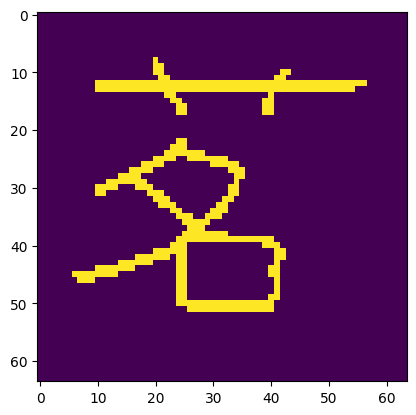

In [ ]:
def process_screenshot(path):
    with Image.open(path).convert('L') as img:
        img = img.resize((64,64))
        img = PIL.ImageOps.invert(img)
        img = img.point( lambda p: 255 if p > 30 else 0 )
    img = np.expand_dims(np.array(img), 0)
    img = torch.FloatTensor(img)
    return img
    
    
test_img = process_screenshot('../canvas.png')
plt.imshow(test_img[0])
output = model(test_img.unsqueeze(0))
prediction = torch.argmax(output)
prediction = kanji_dict[prediction.item()]
print(f'prediction: {prediction}')
if prediction == kanji_dict[int(n/num_samples_each_img)]:
    print('correct!')
else:
    print('wrong')